In [1]:
import numpy as np
import math
from mpmath import *
import matplotlib.pyplot as plt


In [2]:
mp.dps = 20000 ; mp.pretty = False
print(mp)
w = mpf(4)
print(w)
print(type(w))

Mpmath settings:
  mp.prec = 66442             [default: 53]
  mp.dps = 20000              [default: 15]
  mp.trap_complex = False     [default: False]
4.0
<class 'mpmath.ctx_mp_python.mpf'>


In [3]:
n_point      = 1120
#n_bin_rdf    =
n_temp       = 100
start_temp   = 1000
delta_temp   = 10
#kB           = 6.3336374823584e-6 # in Rydberg/K 
kB           = 8.617385e-5 #eV/K
n_walkers    = 500
print(kB)

8.617385e-05


In [4]:
#Create list of temperature steps
T = [start_temp]
for x in range(1, n_temp) :
    T.append(T[x-1] + delta_temp)
    
print(T)


[1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]


In [5]:
# Loop starts here for each traj file Could be called once for each loop 
# in qw scripts, probs best way
beta = []
for x in range(len(T)) :
    beta.append(1.0 / (kB * T[x]))
print(beta)

[11.604448449268544, 11.489552920067865, 11.376910244380925, 11.26645480511509, 11.15812350891206, 11.051855665970042, 10.947592876668436, 10.84527892455004, 10.74485967524865, 10.646282980980315, 10.54949859024413, 10.454458062404093, 10.361114686846914, 10.26942340643234, 10.179340744972407, 10.090824738494385, 10.00383487005909, 9.918332007921832, 9.834278346837749, 9.751637352326506, 9.670373707723787, 9.5904532638583, 9.511842991203723, 9.434510934364669, 9.358426168764954, 9.283558759414834, 9.2098797216417, 9.137360983676018, 9.06597535099105, 8.995696472301196, 8.926498807129649, 8.858357594861483, 8.791248825203441, 8.725149209976347, 8.660036156170554, 8.595887740198922, 8.532682683285694, 8.470400327933243, 8.409020615411988, 8.348524064221975, 8.288891749477532, 8.23010528316918, 8.172146795259538, 8.114998915572407, 8.058644756436488, 8.003067896047272, 7.948252362512701, 7.894182618550031, 7.84084354680307, 7.788220435750701, 7.736298966179029, 7.685065198191089, 7.634505

In [6]:
n_walkers=500
z = np.zeros((n_temp))


#Loop for files would be here!!! (Load in iterations, E and bins/rdf)

E = np.loadtxt(str('32Cu.ener_temp'))
print(E)
E_min = np.amin(E)
E = E + abs(E_min ) - 1
print(np.amin(E), np.amax(E))
print(E)
iter = np.loadtxt(str('32Cu.iter_temp'))


#for x in range(len(iter)):
#        print(iter[x])
#        w = ((iter[x]-1)*(math.log(n_walkers/(n_walkers+1)))) - ( iter[x] * math.log(n_walkers/(n_walkers +1))) 
#        print(w)

bins = np.loadtxt(str('foo'), usecols=(0))
rdf = np.loadtxt(str('allrdf.out'), usecols=(1))

rdf = np.reshape(rdf, (len(iter),len(bins)))

    


sum_rdf = np.zeros((len(bins),n_temp))
#Loop for files would be here!!! (Load in iterations, E and bins/rdf)
log_w = 0
#Start looping through each configuration
z_sum = np.zeros(n_temp)
z_array = np.zeros((len(iter),n_temp))
z_array =  z_array - 50000


z_sum =[]
for x in range(n_temp):
    z_sum.append(0)
    
for x in range(len(iter)) :
    
    log_w = (iter[x]*((math.log(n_walkers)-math.log(n_walkers+1)))) - math.log(n_walkers+1) 

    for y in range(n_temp):
       
        boltz_this = (-beta[y] * E[x])
        z_array[x,y] = boltz_this +log_w   #?this could be right
        #print(math.log(abs(boltz_this +log_w)))
        #z_array[x,y] = math.log(abs(boltz_this + log_w))  switch

        
        

for x in range(len(iter)) :
    for y in range(n_temp):
    
        
        z_term = mpf(math.exp(z_array[x,y] - np.amax(z_array[:,y]))) #!!this could be right?
       # z_term =  mpf(-(math.exp(z_array[x,y] - np.amax(z_array[:,y])))) ##switch
       # print(np.amax(z_array[:,y]))
        #print(z_array[x,y])
        #print(z_term)

        z_sum[y] = mpf(z_sum[y]) + mpf(z_term)
       # if x ==5 :
        #    print (z_sum[y])
        for k in range(len(bins)) :
            sum_rdf[k,y] = sum_rdf[k,y] + rdf[x,k] * z_term
            #print(sum_rdf[k,y])
        

print(sum_rdf[50,:])


[2641.59002608  678.98469341  373.05486555  107.38724795   -9.20904123
 -116.72286809 -116.76487864 -116.76941685 -116.77282641 -116.77311044
 -116.77565862 -116.7772551 ]
-1.0 2757.3672811810457
[ 2.75736728e+03  7.94761949e+02  4.88832121e+02  2.23164503e+02
  1.06568214e+02 -9.45612991e-01 -9.87623541e-01 -9.92161751e-01
 -9.95571307e-01 -9.95855340e-01 -9.98403523e-01 -1.00000000e+00]
[7.12856513e-200 1.65112594e-194 3.00169494e-189 4.31345246e-184
 4.93289174e-179 4.51887188e-174 3.33685381e-169 1.99824133e-164
 9.76090254e-160 3.91109366e-155 1.29246572e-150 3.54090481e-146
 8.08285730e-142 1.54480922e-137 2.48355677e-133 3.37382102e-129
 3.88965015e-125 3.82178947e-121 3.21333441e-117 2.32104695e-113
 1.44577195e-109 7.79467561e-106 3.65023576e-102 1.48991155e-098
 5.31815156e-095 1.66540295e-091 4.58975725e-088 1.11656142e-084
 2.40473828e-081 4.59807157e-078 7.82706427e-075 1.18930563e-071
 1.61726264e-068 1.97309288e-065 2.16495725e-062 2.14145826e-059
 1.91391196e-056 1.5489

In [7]:
print(z_sum)
for y in range(len(bins)):
        for x in range(n_temp) :
            sum_rdf[y,x] = sum_rdf[y,x] / z_sum[x]
   


[mpf('1.0000000000000000000000000000000000000000000000000000000000000054421728923863894915617068578790475637769218631262536845061518252540613764567167685135060666211894844558972854533886342854398318707424287383328323281419381253131667996180265900132363720682241642470386165321340835140546095223567215352968886537788706529773662056385980913150256969099327645835860755116279651048875874656982645920905938803308922685567734095494295501420145699883548293915831257550933193051749490087617155457620139017405800243912572927203265589063260569839198974747292022947347311337846491370716027532388447876407496864337997553737339882861960262413466988845280481415254889963174454221606402339746340719540846840798615087463639823255268384800122388384986266357783409920322113677368408252105938381076035941989154965335505841593499720687532317242585122585296630859375'), mpf('1.00000000000000000000000000000000000000000000000000000000000000541596777414861548405179216564460516948508426352102341203148462016686811774263918

In [8]:
print(sum_rdf[66,:])
print(np.shape(sum_rdf))

[1.37033370e-199 3.17398171e-194 5.77019874e-189 8.29180794e-184
 9.48256444e-179 8.68668846e-174 6.41447916e-169 3.84124630e-164
 1.87635148e-159 7.51834819e-155 2.48452432e-150 6.80672915e-146
 1.55377858e-141 2.96960763e-137 4.77417473e-133 6.48554173e-129
 7.47712703e-125 7.34667753e-121 6.17703614e-117 4.46177992e-113
 2.77922695e-109 1.49838102e-105 7.01689752e-102 2.86407710e-098
 1.02231546e-094 3.20142659e-091 8.82295238e-088 2.14638110e-084
 4.62266089e-081 8.83893511e-078 1.50460714e-074 2.28621828e-071
 3.10888583e-068 3.79290310e-065 4.16172657e-062 4.11655414e-059
 3.67913881e-056 2.97766012e-053 2.18704278e-050 1.46083874e-047
 8.89188382e-045 4.94185917e-042 2.51261782e-039 1.17088179e-036
 5.01001171e-034 1.97183369e-031 7.15078051e-029 2.39339133e-026
 7.40554366e-024 2.12163207e-021 5.63665801e-019 1.39079360e-016
 3.19173501e-014 6.82230777e-012 1.36012019e-009 2.53250524e-007
 4.40971006e-005 7.15992893e-003 6.66924165e-001 1.67788760e+000
 1.69579332e+000 1.695927

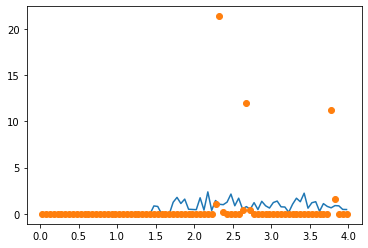

In [14]:
plt.figure()
plt.plot(bins[:],sum_rdf[:,60])
plt.plot(bins[:],sum_rdf[:,1], 'o')


In [21]:
#for x in range(len(bins)):
# ~   for y in range(n_temp):#      print(
for x in range(len(bins)) :        
    print(bins[x], sum_rdf[x,:])

0.025 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.075 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.125 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.175 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 